In [1]:
import neilpy
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# First we read the data

header, df = neilpy.read_las('points.las')

In [3]:
# Create a DSM for comparison and create a bonemap

cellsize = 2

Zmax, Tmax = neilpy.create_dem(df.x,df.y,df.z,cellsize=cellsize,bin_type='max',inpaint=True)
Bmax = neilpy.pssm(Zmax,cellsize=cellsize)
plt.imsave('dsm_bonemap.png',Bmax)
neilpy.write_worldfile(Tmax,'dsm_bonemap.pgw')

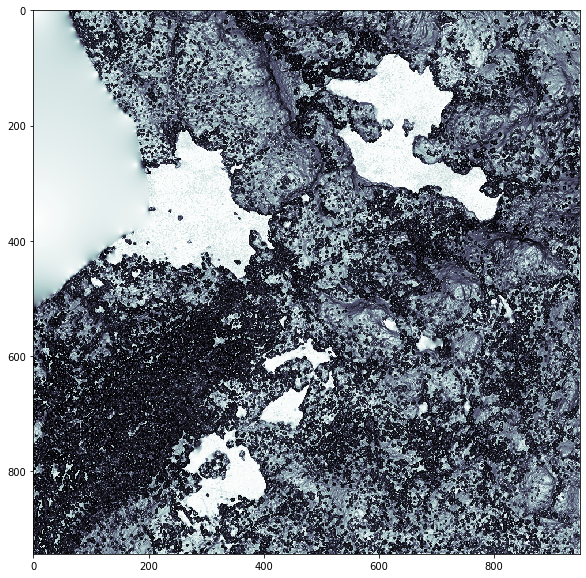

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(Bmax,aspect='equal')

In [5]:
# Run SMRF

windows = 18
slope_threshold = .15
elevation_threshold = .5
elevation_scaler = 1.25

Zsmrf, Tsmrf, obj_cells, obj_points = neilpy.smrf(df.x,df.y,df.z,cellsize,windows,slope_threshold,
                                                  elevation_threshold,elevation_scaler)

In [6]:
# Save filtered DEM
with rasterio.open('smrfed.tif', 'w', driver='GTiff', 
                             height=Zsmrf.shape[0], width=Zsmrf.shape[1],
                             count=1, dtype=np.float32, transform=Tsmrf) as src:
    src.write(Zsmrf.astype(np.float32), 1)
    
# Calculate and Save Bonemap
Bsmrf = neilpy.pssm(Zsmrf,cellsize=cellsize)
plt.imsave('smrfed_bonemap.png',Bsmrf)
neilpy.write_worldfile(Tsmrf,'smrfed_bonemap.pgw')

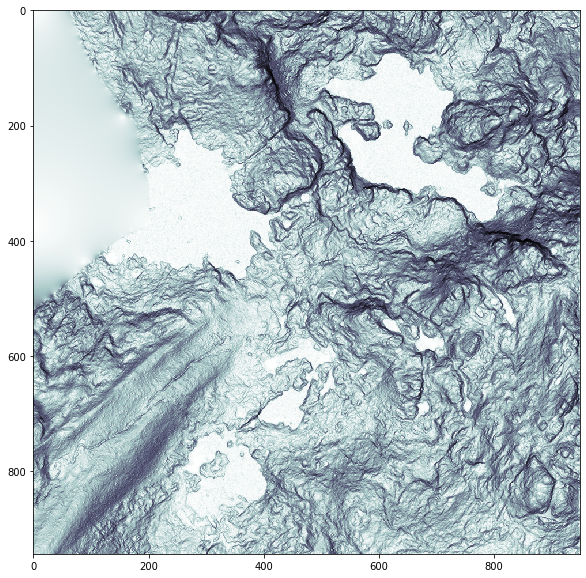

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(Bsmrf,aspect='equal')